In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel('OTP_Time_Series_Master_Current-March-2024.xlsx')
df.head()

,Route,Departing Port,Arriving Port,Airline,Month,Sectors Scheduled,Sectors Flown,Cancellations,Departures On Time,Arrivals On Time,Departures Delayed,Arrivals Delayed,OnTime Departures \n(%),OnTime Arrivals \n(%),Cancellations \n\n(%)
0,Adelaide-Brisbane,Adelaide,Brisbane,Jetstar,2020-01-01,30,27,3,18,19,9,8,66.666667,70.37037,10.000000
1,Adelaide-Gold Coast,Adelaide,Gold Coast,Jetstar,2020-01-01,31,30,1,15,14,15,16,50,46.666667,3.225806
2,Adelaide-Melbourne,Adelaide,Melbourne,Jetstar,2020-01-01,119,106,13,61,66,45,40,57.54717,62.264151,10.924370
3,Adelaide-Perth,Adelaide,Perth,Jetstar,2020-01-01,21,20,1,11,16,9,4,55.0,80,4.761905
4,Adelaide-Sydney,Adelaide,Sydney,Jetstar,2020-01-01,91,87,4,69,69,18,18,79.310345,79.310345,4.395604


In [3]:
# df.rename(columns={
#     'OnTime Departures \n(%)' : 'OnTime Departures', 
#     'OnTime Arrivals \n(%)' :'OnTime Arrivals', 
#     'Cancellations \n\n(%)' : 'Cancellations'}, inplace = True)
#Code could not be run when I tried renaming the column, hence stuck with the same column names.
df.drop(index=df[df['Departing Port'] == 'All Ports'].index, inplace=True)

In [4]:
#Q4
#grouping the data as per Sector Scheduled and the Number of Cancellations
departing_ports = df.groupby('Departing Port').agg({
    'Sectors Scheduled': 'sum',
    'Cancellations' : 'sum'
}).reset_index()
departing_ports.head()

,Departing Port,Sectors Scheduled,Cancellations
0,Adelaide,166166,9212
1,Albury,15072,496
2,Alice Springs,4962,92
3,Armidale,10244,658
4,Ayers Rock,340,30


In [5]:
#Formula to calcualte cancellation percentage
departing_ports['Cancellation Percentage'] = (departing_ports['Cancellations'] / departing_ports['Sectors Scheduled']) * 100
departing_ports

,Departing Port,Sectors Scheduled,Cancellations,Cancellation Percentage
0,Adelaide,166166,9212,5.543854
1,Albury,15072,496,3.290870
2,Alice Springs,4962,92,1.854091
3,Armidale,10244,658,6.423272
4,Ayers Rock,340,30,8.823529
5,Ballina,19358,982,5.072838
6,Brisbane,422052,23018,5.453830
7,Broome,13384,590,4.408249
8,Bundaberg,1002,26,2.594810
9,Cairns,79450,3270,4.115796


In [6]:
#arriving ports 
arriving_ports = df.groupby('Arriving Port').agg({
    'Sectors Scheduled': 'sum',
    'Cancellations': 'sum'
}).reset_index()

arriving_ports['Cancellation Percentage'] = (arriving_ports['Cancellations'] / arriving_ports['Sectors Scheduled']) * 100
arriving_ports

,Arriving Port,Sectors Scheduled,Cancellations,Cancellation Percentage
0,Adelaide,166270,9124,5.487460
1,Albury,15092,466,3.087729
2,Alice Springs,4962,86,1.733172
3,Armidale,10174,570,5.602516
4,Ayers Rock,336,28,8.333333
5,Ballina,19370,928,4.790914
6,Brisbane,422270,23476,5.559476
7,Broome,13352,508,3.804673
8,Bundaberg,1152,30,2.604167
9,Cairns,79460,3214,4.044802


## Answer to Question 4 Departing Ports

In [7]:
#Absolute number cancellation
top_5_departing_numeric = departing_ports.sort_values(by='Cancellations', ascending=False).head(5)
print("Top 5 Departing Ports by Absolute Number of Cancellations")
print(top_5_departing_numeric)

Top 5 Departing Ports by Absolute Number of Cancellations
   Departing Port  Sectors Scheduled  Cancellations  Cancellation Percentage
36         Sydney             573494          44516                 7.762243
24      Melbourne             489628          41930                 8.563644
6        Brisbane             422052          23018                 5.453830
0        Adelaide             166166           9212                 5.543854
29          Perth             170646           7790                 4.565006


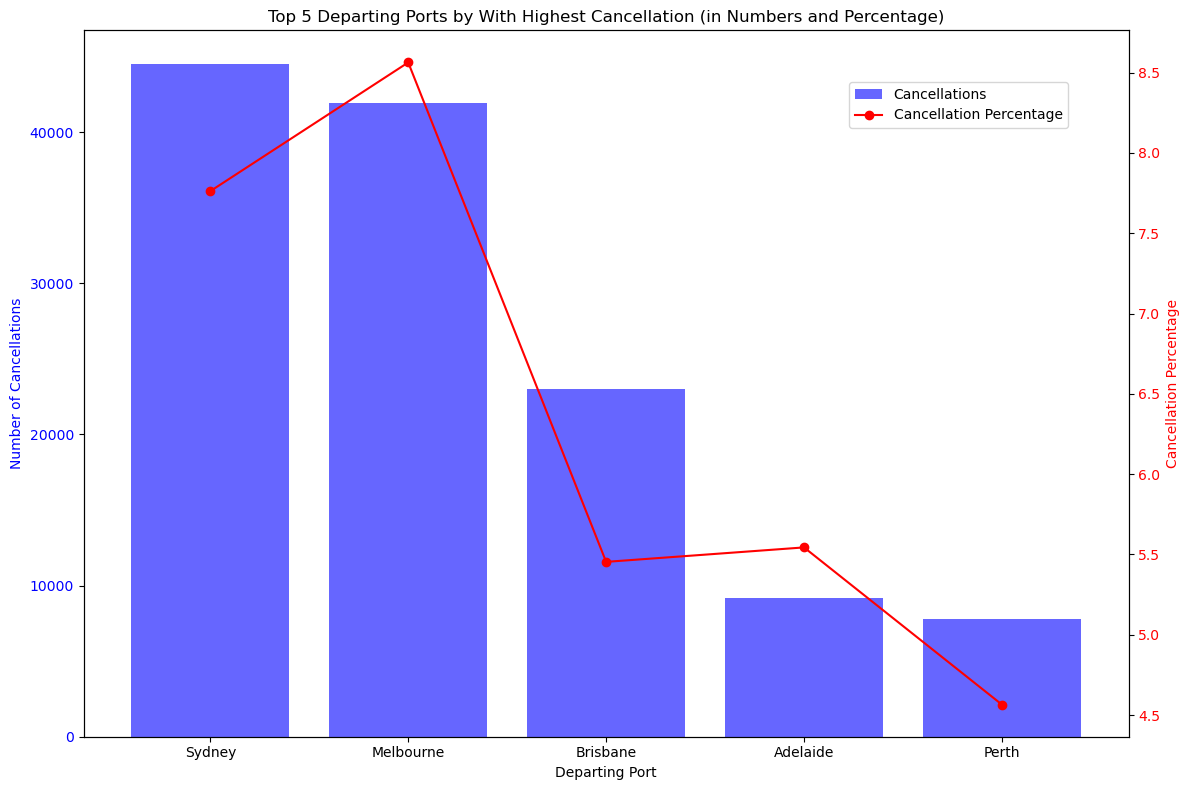

In [8]:
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.bar(top_5_departing_numeric["Departing Port"], top_5_departing_numeric["Cancellations"], color='b', alpha=0.6, label='Cancellations')
ax1.set_xlabel('Departing Port')
ax1.set_ylabel('Number of Cancellations', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot Cancellation Percentage
ax2 = ax1.twinx()
ax2.plot(top_5_departing_numeric["Departing Port"], top_5_departing_numeric["Cancellation Percentage"], color='r', marker='o', 
         label='Cancellation Percentage')
ax2.set_ylabel('Cancellation Percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Title and legend
plt.title('Top 5 Departing Ports by With Highest Cancellation (in Numbers and Percentage)')
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(0.9,0.9))

plt.show()

In [ ]:
#Percentage cancellation
top_5_departing_perc = departing_ports.sort_values(by='Cancellation Percentage', ascending=False).head(5)
print("Top 5 Departing Ports by Percentage of Cancellations")
print(top_5_departing_perc)

Top 5 Departing Ports by Percentage of Cancellations
   Departing Port  Sectors Scheduled  Cancellations  Cancellation Percentage
4      Ayers Rock                340             30                 8.823529
24      Melbourne             489628          41930                 8.563644
36         Sydney             573494          44516                 7.762243
17     Gold Coast             100388           7264                 7.235925
10       Canberra             103834           6940                 6.683745


## Answer to Question 4 Arriving Ports

In [ ]:
#Absolute Number Cancellations
top_5_arriving_numeric = arriving_ports.sort_values(by='Cancellations', ascending=False).head(5)
print("Top 5 Arriving Ports by Absolute Number of Cancellations")
print(top_5_arriving_numeric)

Top 5 Arriving Ports by Absolute Number of Cancellations
   Arriving Port  Sectors Scheduled  Cancellations  Cancellation Percentage
36        Sydney             573614          45672                 7.962149
24     Melbourne             489144          42460                 8.680470
6       Brisbane             422270          23476                 5.559476
0       Adelaide             166270           9124                 5.487460
29         Perth             170548           7970                 4.673171


In [ ]:
#Percentage cancellation
top_5_arriving_perc = arriving_ports.sort_values(by='Cancellation Percentage', ascending=False).head(5)
print("Top 5 Arriving Ports by Percentage of Cancellations")
print(top_5_arriving_perc)

Top 5 Arriving Ports by Percentage of Cancellations
   Arriving Port  Sectors Scheduled  Cancellations  Cancellation Percentage
24     Melbourne             489144          42460                 8.680470
4     Ayers Rock                336             28                 8.333333
36        Sydney             573614          45672                 7.962149
17    Gold Coast             100396           7170                 7.141719
10      Canberra             103902           6684                 6.432985
